In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

# Preprocessing

In [1]:
from preprocessing import *

fpath_mapping_df = clean_filepath_filename_mapping_csv('Breast-Cancer-MRI-filepath_filename-mapping.csv')

In [5]:
sample_subject = 'Breast_MRI_025'

image_array, dcm_data, nrrd_breast_data, nrrd_dv_data = read_precontrast_mri_and_segmentation(
    sample_subject,
    'Duke-Breast-Cancer-MRI',
    fpath_mapping_df,
    'train_annotations'
)

image_array = zscore_image(normalize_image(image_array))

# Save data

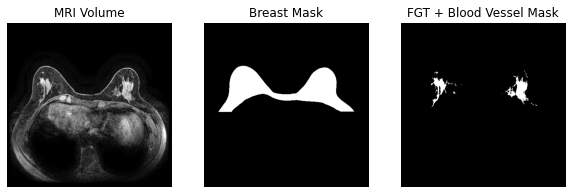

In [14]:
plt.subplot(1, 3, 1)
plt.title('MRI Volume')
plt.imshow(image_array[:, :, 50], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Breast Mask')
plt.imshow(nrrd_breast_data[:, :, 50], cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('FGT + Blood Vessel Mask')
plt.imshow(nrrd_dv_data[:, :, 50], cmap='gray')
plt.axis('off')

plt.show()

## Sample Modeling

In [ ]:
# Breast Training sample script

from dataset_3d import Dataset3DRandom
from train import train_model
from unet import UNet3D
import torchio as tio

input_dim = 96
total_train_samples = 20000
total_val_samples = 4000

num_blocks = 3
model_save_name = 'sample_breast_model'
n_channels = 1
n_classes = 1
batch_size = 16
epochs = 20

train_image_dir = 'data/mri_data/train'
val_image_dir = 'data/mri_data/val'
train_mask_dir = 'data/segmentations/breast_npy/train'
val_mask_dir = 'data/segmentations/breast_npy/val'

model_save_dir = 'model_save_dir'

train_transforms = tio.Compose([
])

val_transforms = tio.Compose([
])

train_dataset = Dataset3DRandom(
    image_dir = train_image_dir,
    mask_dir = val_mask_dir,
    input_dim = input_dim,
    total_samples = total_train_samples,
    transforms = train_transforms,
    one_hot_mask = True
)

val_dataset = Dataset3DRandom(
    image_dir = val_image_dir,
    mask_dir = val_mask_dir,
    input_dim = input_dim,
    total_samples = total_val_samples,
    transforms = val_transforms,
    one_hot_mask = True
)

unet = UNet3D(
    in_channels=n_channels, 
    out_classes=n_classes,
    num_encoding_blocks=num_blocks,
    padding=True,
    normalization='batch'
)

trained_unet = train_model(
    model = unet,
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    n_classes = n_channels,
    n_channels = n_classes,
    batch_size = batch_size,
    learning_rate = 3e-4,
    epochs = epochs,
    model_save_dir = model_save_dir,
    model_save_name = model_save_name,
    num_workers = 8,
    loss='cross',
)

In [ ]:
# FGT + Blood Vessel Training sample script

from dataset_3d import Dataset3DRandom
from train import train_model
from unet import UNet3D
import torchio as tio

input_dim = 96
total_train_samples = 20000
total_val_samples = 4000

num_blocks = 3
model_save_name = 'sample_breast_model'
n_channels = 1
n_classes = 3
batch_size = 16
epochs = 20

train_image_dir = 'data/mri_data/train'
val_image_dir = 'data/mri_data/val'

train_mask_dir = 'data/segmentations/dv_npy/train'
val_mask_dir = 'data/segmentations/dv_npy/val'

train_input_mask_dir = 'data/preds/breast_model_preds/train'
train_val_mask_dir = 'data/preds/breast_model_preds/val'

model_save_dir = 'model_save_dir'

train_transforms = tio.Compose([
])

val_transforms = tio.Compose([
])

train_dataset = Dataset3DRandom(
    image_dir = train_image_dir,
    mask_dir = train_mask_dir,
    additional_input_dir = train_input_mask_dir,
    input_dim = input_dim,
    total_samples = total_train_samples,
    transforms = train_transforms,
    one_hot_mask = True
)

val_dataset = Dataset3DRandom(
    image_dir = val_image_dir,
    mask_dir = val_mask_dir,
    additional_input_dir = train_val_mask_dir,
    input_dim = input_dim,
    total_samples = total_val_samples,
    transforms = val_transforms,
    one_hot_mask = True
)

unet = UNet3D(
    in_channels=n_channels, 
    out_classes=n_classes,
    num_encoding_blocks=num_blocks,
    padding=True,
    normalization='batch'
)

trained_unet = train_model(
    model = unet,
    train_dataset = train_dataset,
    val_dataset = val_dataset,
    n_classes = n_channels,
    n_channels = n_classes,
    batch_size = batch_size,
    learning_rate = 3e-4,
    epochs = epochs,
    model_save_dir = model_save_dir,
    model_save_name = model_save_name,
    num_workers = 8,
    loss='dice',
)
